Signal processing is a field of engineering and applied mathematics that analyzes analog and digital signals, corresponding to variables that vary with time. One of
the categories of signal processing techniques is time series analysis. A time series
is an ordered list of data points starting with the oldest measurements first. The data points are usually equidistant, for instance, consistent with daily or annual sampling. In time series analysis, the order of the values is important. It's common to try to derive a relation between a value and another data point or combination of data points a fixed number of periods in the past, in the same time series.

The time series examples use annual sunspot cycles data.

### Moving averages
Moving averages are frequently used to analyze time series. A moving average
specifies a window of data that is previously seen, which is averaged each time
the window slides forward by one period

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=11,center=False).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,center=False).mean()


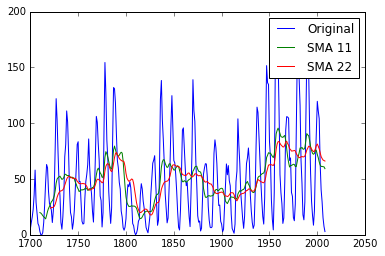

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.stats.moments import rolling_mean
%matplotlib inline

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
year_range = df["YEAR"].values
plt.plot(year_range, df["SUNACTIVITY"].values, label="Original")
plt.plot(year_range, rolling_mean(df, 11)["SUNACTIVITY"].values, label="SMA 11")
plt.plot(year_range, rolling_mean(df, 22)["SUNACTIVITY"].values, label="SMA 22")
plt.legend()
plt.show()

### Window functions

A window function is a function that is defined within an interval (the window)
or is otherwise zero valued. We can use window functions for spectral analysis and
filter design

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,axis=0,win_type=boxcar,center=False).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,axis=0,win_type=triang,center=False).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,axis=0,win_type=blackman,center=False).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=22,axis=0,win_type=hanning,center=False).mean()
C:\Anaconda3\lib\site

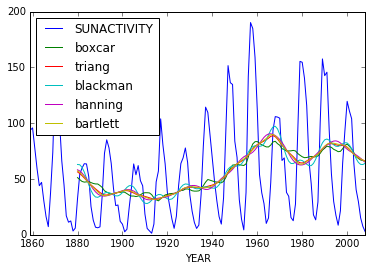

In [5]:
from pandas.stats.moments import rolling_window
import pandas as pd

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data.tail(150)
df = pd.DataFrame({'SUNACTIVITY':df['SUNACTIVITY'].values}, index=df['YEAR'])
ax = df.plot()

def plot_window(win_type):
    df2 = rolling_window(df, 22, win_type)
    df2.columns = [win_type]
    df2.plot(ax=ax)

plot_window('boxcar')
plot_window('triang')
plot_window('blackman')
plot_window('hanning')
plot_window('bartlett')
plt.show()



### Cointegration
is similar to correlation but is viewed by many as a superior metric
to define the relatedness of two time series. Two time series x(t) and y(t) are
cointegrated if a linear combination of them is stationary. In such a case, the
following equation should be stationary:
    
y(t) – a x(t)

The Augmented Dickey-Fuller (ADF) test tests for a unit root in a time series and can be used to determine the cointegration
of time series.

In [6]:
import statsmodels.tsa.stattools as ts
import numpy as np

def calc_adf(x, y):
    result = sm.OLS(x, y).fit()    
    return ts.adfuller(result.resid)

data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data.values
N = len(data)

t = np.linspace(-2 * np.pi, 2 * np.pi, N)
sine = np.sin(np.sin(t))
print ("Self ADF", calc_adf(sine, sine))

noise = np.random.normal(0, .01, N)
print ("ADF sine with noise", calc_adf(sine, sine + noise))

cosine = 100 * np.cos(t) + 10
print ("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

print ("Sine vs sunspots", calc_adf(sine, data))



Self ADF (3.9563194764951599e-16, 0.95853208606005602, 0, 308, {'1%': -3.4517611601803702, '10%': -2.5717944160060719, '5%': -2.8709700936076912}, -21598.896016765088)
ADF sine with noise (-16.877238691942487, 1.0697202192822224e-29, 0, 308, {'1%': -3.4517611601803702, '10%': -2.5717944160060719, '5%': -2.8709700936076912}, -1867.4718247436967)
ADF sine vs cosine with noise (-21.175745826199581, 0.0, 16, 292, {'1%': -3.4529449243622383, '10%': -2.5720714378870331, '5%': -2.8714895534256861}, -11316.555770599822)
Sine vs sunspots (-6.7242691810700999, 3.4210811915549524e-09, 16, 292, {'1%': -3.4529449243622383, '10%': -2.5720714378870331, '5%': -2.8714895534256861}, -1102.5867415291168)


### Autocorrelation 
is correlation within a dataset and can indicate a trend.For example, if we have a lag of one period, we can check if the previous value
influences the current value. For that to be true, the autocorrelation value has to
be pretty high.

[ 9 11 10  1  0]


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


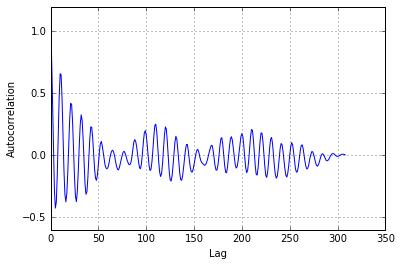

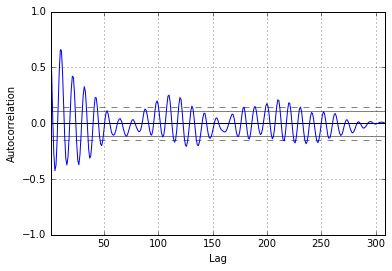

In [7]:
from pandas.tools.plotting import autocorrelation_plot
data_loader = sm.datasets.sunspots.load_pandas()
data = data_loader.data["SUNACTIVITY"].values
y = data - np.mean(data)
norm = np.sum(y ** 2)
correlated = np.correlate(y, y, mode='full')/norm
res = correlated[len(correlated)/2:]

print (np.argsort(res)[-5:])
plt.plot(res)
plt.grid(True)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()
autocorrelation_plot(data)
plt.show()


Refer to the first plot for the end result and compared with the plot produced by pandas

### An autoregressive model 
can be used to represent a time series with the goal of
forecasting future values. In such a model, a variable is assumed to depend on its
previous values. The relation is also assumed to be linear and we are required to
fit the data in order to find the parameters of the data.

Params [ 0.67172672  0.33626295]
Root mean square error 22.8148122613
Mean absolute error 17.6515446503
Mean absolute percentage error 60.7817800736
Symmetric Mean absolute percentage error 34.9843386176
Coefficient of determination 0.799940292779


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


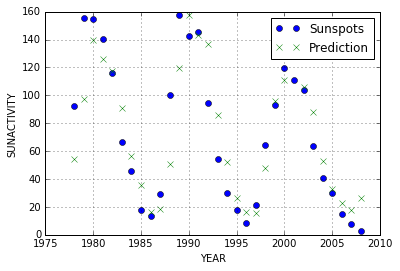

In [8]:
from scipy.optimize import leastsq
import statsmodels.api as sm

def model(p, x1, x10):
   p1, p10 = p
   return p1 * x1 + p10 * x10

def error(p, data, x1, x10):
   return data - model(p, x1, x10)

def fit(data):
   p0 = [.5, 0.5]
   params = leastsq(error, p0, args=(data[10:], data[9:-1], data[:-10]))[0]
   return params

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

cutoff = .9 * len(sunspots)
params = fit(sunspots[:cutoff])
print ("Params", params)

pred = params[0] * sunspots[cutoff-1:-1] + params[1] * sunspots[cutoff-10:-10]
actual = sunspots[cutoff:]
print ("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print ("Mean absolute error", np.mean(np.abs(actual - pred)))
print ("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print ("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print ("Coefficient of determination", 1 - ((actual - pred) ** 2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
plt.legend()

### ARMA models 
are often used to forecast a time series. These models combine
autoregressive and moving average models. In moving average models,
we assume that a variable is the sum of the mean of the time series and a linear
combination of noise components.

Fortunately, it's possible to use the statsmodelssm.tsa.ARMA() routine for this
analysis.

C:\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


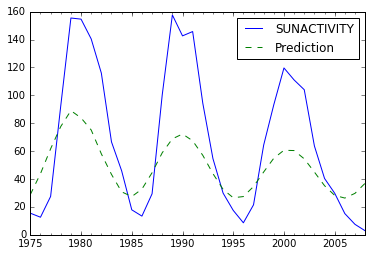

In [9]:
import datetime

data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data
years = df["YEAR"].values.astype(int)
df.index = pd.Index(sm.tsa.datetools.dates_from_range(str(years[0]), str(years[-1])))
del df["YEAR"]

model = sm.tsa.ARMA(df, (10,1)).fit()
prediction = model.predict('1975', str(years[-1]), dynamic=True)

df['1975':].plot()
prediction.plot(style='--', label='Prediction');
plt.legend();
plt.show()

### Generating periodic signals

Params [ 47.18800335  28.89947427   0.56827284   6.51168781   4.55215008
   0.29372074 -14.30920341 -18.16523992   0.06574835  -4.37789699]
Root mean square error 59.5619302557
Mean absolute error 44.5814683157
Mean absolute percentage error 65.1640490451
Symmetric Mean absolute percentage error 78.4477672431
Coefficient of determination -0.363525792717


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


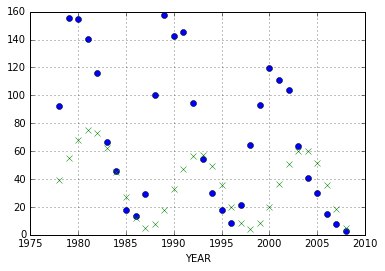

In [10]:
def model(p, t):
   C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = p
   return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) +p3 * np.sin(f3 * t + phi3)


def error(p, y, t):
   return y - model(p, t)

def fit(y, t):
   p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * np.pi/100, 0]
   params = leastsq(error, p0, args=(y, t))[0]
   return params

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

cutoff = .9 * len(sunspots)
params = fit(sunspots[:cutoff], years[:cutoff])
print ("Params", params)

pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]
print ("Root mean square error", np.sqrt(np.mean((actual - pred) ** 2)))
print ("Mean absolute error", np.mean(np.abs(actual - pred)))
print ("Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print ("Symmetric Mean absolute percentage error", 100 * np.mean(np.abs(actual - pred)/mid))
print ("Coefficient of determination", 1 - ((actual - pred) ** 2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
plt.xlabel("YEAR")

### Fourier analysis 
is based on the Fourier series named after the mathematician
Joseph Fourier. The Fourier series is a mathematical method used to represent
functions as an infinite series of sine and cosine terms.

The most efficient algorithm for Fourier analysis is the Fast Fourier Transform (FFT).
This algorithm is implemented in SciPy and NumPy. When applied to the time series
data, the Fourier analysis transforms maps onto the frequency domain, producing a
frequency spectrum. The frequency spectrum displays harmonics as distinct spikes
at certain frequencies. Music, for example, is composed from different frequencies
with the note A at 440 Hz. The note A can be produced by a pitch fork. We can
produce this and other notes with musical instruments such as a piano. White noise
is a signal consisting of many frequencies, which are represented equally. White
light is a mix of all the visible frequencies of light, also represented equally.

Index of max sine FFT [160 157 166 158 154]
Indices of max sunspots FFT [205 212 215 209 154]


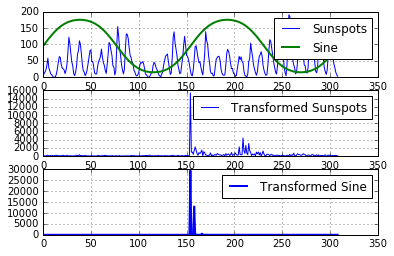

In [11]:
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

t = np.linspace(-2 * np.pi, 2 * np.pi, len(sunspots))
mid = np.ptp(sunspots)/2
sine = mid + mid * np.sin(np.sin(t))

sine_fft = np.abs(fftshift(rfft(sine)))
print ("Index of max sine FFT", np.argsort(sine_fft)[-5:])


transformed = np.abs(fftshift(rfft(sunspots)))
print ("Indices of max sunspots FFT", np.argsort(transformed)[-5:])

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.plot(sine, lw=2, label="Sine")
plt.grid(True)
plt.legend()
plt.subplot(312)
plt.plot(transformed, label="Transformed Sunspots")
plt.grid(True)
plt.legend()
plt.subplot(313)
plt.plot(sine_fft, lw=2, label="Transformed Sine")
plt.grid(True)
plt.legend()
plt.show()


### Spectral analysis

The power spectrum of a physical signal visualizes the energy distribution
of the signal. The phase spectrum visualizes the phase (the initial angle of a sine function).

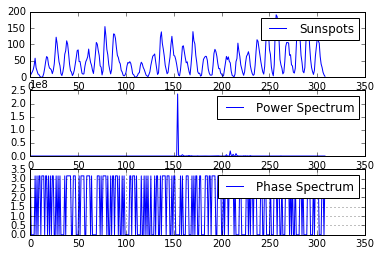

In [12]:
from scipy.fftpack import rfft
from scipy.fftpack import fftshift

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values

transformed = fftshift(rfft(sunspots))

plt.subplot(311)
plt.plot(sunspots, label="Sunspots")
plt.legend()
plt.subplot(312)
plt.plot(transformed ** 2, label="Power Spectrum")
plt.legend()
plt.subplot(313)
plt.plot(np.angle(transformed), label="Phase Spectrum")
plt.grid(True)
plt.legend()
plt.show()


### Filtering 
is a type of signal processing, which involves removing or suppressing a
part of the signal. After applying FFT, we can filter high or low frequencies, or we
can try to remove the white noise. White noise is a random signal with a constant
power spectrum and as such doesn't contain any useful information. The scipy.
signal package has a number of utilities for filtering.

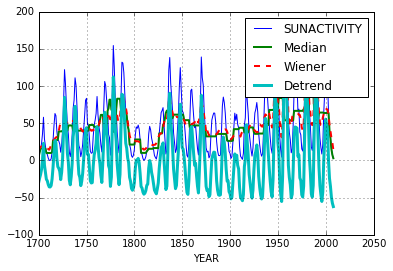

In [13]:
from scipy.signal import medfilt
from scipy.signal import wiener
from scipy.signal import detrend

data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

plt.plot(years, sunspots, label="SUNACTIVITY")
plt.plot(years, medfilt(sunspots, 11), lw=2, label="Median")
plt.plot(years, wiener(sunspots, 11), '--', lw=2, label="Wiener")
plt.plot(years, detrend(sunspots), lw=3, label="Detrend")
plt.xlabel("YEAR")
plt.grid(True)
plt.legend()
plt.show()
